# Bonus: Temperature Analysis I

In [29]:
import pandas as pd
from datetime import datetime as dt

In [30]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [31]:
# Convert the date column format from string to datetime
date_time = [dt.strptime(date, "%Y-%m-%d") for date in df['date']]
df['date'] = date_time

In [32]:
# Set the date column as the DataFrame index
df_time = df.set_index('date')
df_time.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [33]:
# Drop the date column
df.drop(columns=['date'])

,station,prcp,tobs
0,USC00519397,0.08,65
1,USC00519397,0.00,63
2,USC00519397,0.00,74
3,USC00519397,0.00,76
4,USC00519397,NaN,73
...,...,...,...
19545,USC00516128,0.09,71
19546,USC00516128,NaN,78
19547,USC00516128,0.56,76
19548,USC00516128,0.50,76


### Compare June and December data across all years 

In [ ]:
from scipy import stats

In [ ]:
# Filter data for desired months

In [34]:
# Identify the average temperature for June
jun_avg_temp = (df[df['date'].dt.month == 6])['tobs'].mean()
jun_avg_temp

74.94411764705882

In [35]:
# Identify the average temperature for December
dec_avg_temp = (df[df['date'].dt.month == 12])['tobs'].mean()
dec_avg_temp

71.04152933421226

In [36]:
# Create June collections of temperature data
jun_temps = (df[df['date'].dt.month == 6])['tobs']
jun_temps

133      78
134      76
135      78
136      76
137      77
         ..
19492    79
19493    74
19494    74
19495    76
19496    75
Name: tobs, Length: 1700, dtype: int64

In [37]:
# Create December collections of temperature data
dec_temps = (df[df['date'].dt.month == 12])['tobs']
dec_temps


305      76
306      74
307      74
308      64
309      64
         ..
19323    71
19324    71
19325    69
19326    65
19327    65
Name: tobs, Length: 1517, dtype: int64

### Analysis

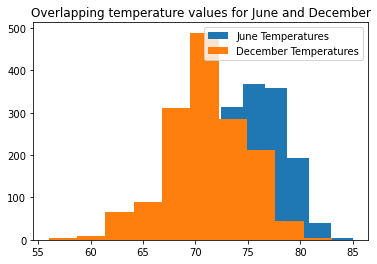

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(jun_temps, label='June Temperatures')
plt.hist(dec_temps, label='December Temperatures')

plt.legend(loc='upper right')
plt.title("Overlapping temperature values for June and December")
plt.show()


In [39]:
# Run paired t-test
import scipy.stats as stats
stats.ttest_ind(a=jun_temps, b=dec_temps, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)